### Summary Tools
- Linear Regression
- Polynomial Regression (No Ridge)
- Polynomial Regression (Ridge)
- Logistic Regression
- MLP
- KMeans

### Linear Regression

In [1]:
# Linear regression using libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]])
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])
X_test = np.array([[0.5]])

model = LinearRegression() # Automatic intercept: By default, LinearRegression adds the intercept
model.fit(X, y)
print("Model coefficients: " + str(model.coef_))
print("Model intercept: " + str(model.intercept_))
print(f"w_linear is: [{model.intercept_} " +  str(model.coef_)[1:-1] + "]")

# prediction
print("y_test is : " + str(model.predict(X_test)))

Model coefficients: [0.49356223]
Model intercept: 2.582832618025751
w_linear is: [2.582832618025751 0.49356223]
y_test is : [2.82961373]


### Polynomial Regression (No Ridge)

In [2]:
# n-th Polynormial regression using libraries
X = np.array([[1,0,1],[1,-1,1]])
y = np.array([0,1]).reshape(-1,1)
X_test = np.array([9]).reshape(-1,1)
from check_inverse import check_inverse_rank
from numpy.linalg import inv
order = 3
Poly = PolynomialFeatures(order)
X_Poly = Poly.fit_transform(X)
if check_inverse_rank(X_Poly @ X_Poly.T): print("invertible")
else: print("not invertible")
X_test_poly = Poly.fit_transform(X_test)
w = inv(X_Poly.T @ X_Poly + 0.0001*np.eye(X_Poly.shape[1])) @ X_Poly.T @ y
print(w)
model = LinearRegression(fit_intercept=False)
# fit_intercept=False: when you already augmented 1.
model.fit(X_Poly, y)
print("Model coefficients: " + str(model.coef_))
print("Model intercept: " + str(model.intercept_))
print(f"w_poly_no_ridge is: {str(model.coef_)}")
# prediction
print("y_test is : " + str(model.predict(X_test_poly)))

matrix rank is : 2
matrix size is : (2, 2)
matrix is invertible
invertible
[[ 9.99973622e-07]
 [ 9.99973395e-07]
 [-9.99980001e-02]
 [ 9.99971462e-07]
 [ 9.99969302e-07]
 [-9.99980001e-02]
 [ 9.99965778e-07]
 [ 9.99980001e-02]
 [-9.99980000e-02]
 [ 9.99971348e-07]
 [ 9.99966915e-07]
 [-9.99980000e-02]
 [ 9.99968051e-07]
 [ 9.99980000e-02]
 [-9.99980001e-02]
 [ 9.99972372e-07]
 [-9.99980000e-02]
 [ 9.99980000e-02]
 [-9.99980000e-02]
 [ 9.99973054e-07]]
Model coefficients: [[-1.23857432e-17  8.95301634e-18 -1.00000000e-01  2.00552466e-17
   2.00552466e-17 -1.00000000e-01  2.00552466e-17  1.00000000e-01
  -1.00000000e-01  2.00552466e-17  2.00552466e-17 -1.00000000e-01
   2.00552466e-17  1.00000000e-01 -1.00000000e-01  2.00552466e-17
  -1.00000000e-01  1.00000000e-01 -1.00000000e-01  2.00552466e-17]]
Model intercept: 0.0
w_poly_no_ridge is: [[-1.23857432e-17  8.95301634e-18 -1.00000000e-01  2.00552466e-17
   2.00552466e-17 -1.00000000e-01  2.00552466e-17  1.00000000e-01
  -1.00000000e-01  

ValueError: X has 4 features, but LinearRegression is expecting 20 features as input.

### Polynomial Regression (Ridge)

In [ ]:
# 6rd polynormial regression with ridge using libraries
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]])
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])
X_test = np.array([[0.5]])
order = 6
Poly = PolynomialFeatures(order)

lamda = 0.0001

model_ridge = make_pipeline(Poly,Ridge(alpha=lamda, fit_intercept=False))  # Poly already includes the bias term,
# therefore fit_intercept=False for Ridge to match the manual implementation.

model_ridge.fit(X, y)
ridge = model_ridge.named_steps['ridge']
# named_steps: a dictionary of all steps in the pipeline.
# model_ridge.named_steps['ridge'] returns the actual Ridge regressor object inside the pipeline
print("Model coefficients: " + str(ridge.coef_))
print("Model intercept: " + str(ridge.intercept_))
print(f"w_poly_ridge is: {str(model.coef_)}")
# prediction
print("y_test is : " + str(model_ridge.predict(X_test)))

Model coefficients: [ 4.64389954 -4.08282769 -1.39058692  3.70437887  3.23921837 -3.85972618
  0.74904689]
Model intercept: 0.0
w_poly_ridge is: [ 22.68414579 -57.24284132  53.24384978 -15.71927731]
y_test is : [2.81142488]


### Logistic Regression
- does not show `lr` used


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = load_iris() # Load as a DataFrame
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print("model coefficients:", model.coef_)
print("model intercept:", model.intercept_)
y_pred_train = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
y_pred_val = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred_val)
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Training accuracy using sklearn: {train_acc}")
print(f"Validation accuracy using sklearn: {val_acc}")
print(f"Test accuracy using sklearn: {test_acc}")

model coefficients: [[-0.39347208  0.96249648 -2.37513113 -0.9987466 ]
 [ 0.50844225 -0.25481505 -0.21301023 -0.77574646]
 [-0.11497017 -0.70768143  2.58814136  1.77449306]]
model intercept: [  9.0089982    1.86893992 -10.87793812]
Training accuracy using sklearn: 0.975
Validation accuracy using sklearn: 1.0
Test accuracy using sklearn: 1.0


### MLP
- MLPClassifier uses sgd + adam -> dynamically rescales learning rates for each weight
and keeps running averages of gradients 
- accuracy result higher than manual MLP (without rescaling of lr) 

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
    
hid_layer_size_list = [32, 36]
train_acc_list = {}
val_acc_list = {}
max_val_acc = 0
best_size = 0
num_iters = 20000
lr = 0.01
order = 1

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = StandardScaler() # Creates a scaler object that standardizes features to have mean = 0 and std = 1.
X_train = scaler.fit_transform(X_train) # Fit and transform the training data
X_val = scaler.transform(X_val) # Transform the validation data
X_test = scaler.transform(X_test) # Transform the test data

Poly = PolynomialFeatures(order)
X_train_poly = Poly.fit_transform(X_train)
X_val_poly = Poly.fit_transform(X_val)
X_test_poly = Poly.fit_transform(X_test)

for hid_layer_size in hid_layer_size_list:
    # Define MLP and fit once to initialize shapes
    mlp = MLPClassifier(hidden_layer_sizes=(hid_layer_size, hid_layer_size), 
                        solver='sgd',
                        max_iter=num_iters, 
                        learning_rate_init=lr,
                        random_state=42)
    mlp.fit(X_train, y_train)

    ytr_pred = mlp.predict(X_train)
    train_acc = accuracy_score(y_train, ytr_pred)
    print(f"Training accuracy for hidden layer size {hid_layer_size}: {train_acc}")
    train_acc_list[hid_layer_size]=train_acc

    yval_pred = mlp.predict(X_val)
    val_acc = accuracy_score(y_val, yval_pred)
    print(f"Validation accuracy for hidden layer size {hid_layer_size}: {val_acc}")
    val_acc_list[hid_layer_size]=val_acc

    if val_acc > max_val_acc:
        max_val_acc = val_acc
        best_size = hid_layer_size
        yts_pred=mlp.predict(X_test)
        test_acc = accuracy_score(y_test, yts_pred)

print(f"Best hidden layer size: {best_size}, Max validation accuracy: {max_val_acc}")
print(f"Test accuracy: {test_acc}")


Training accuracy for hidden layer size 32: 1.0
Validation accuracy for hidden layer size 32: 0.9555555555555556
Training accuracy for hidden layer size 36: 1.0
Validation accuracy for hidden layer size 36: 0.9740740740740741
Best hidden layer size: 36, Max validation accuracy: 0.9740740740740741
Test accuracy: 0.9814814814814815


### KMeans


Dataset feature matrix: [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Dataset target vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Within-cluster variance for 2 clusters: 4543749.614531862
Within-cluster variance for 3 clusters: 2370689.686782968
Within-cluster variance for 4 clusters: 1351749.3691428085
Within-c

c:\Users\andre\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\andre\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\andre\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\andre\anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

Text(0, 0.5, 'Within-cluster variance')

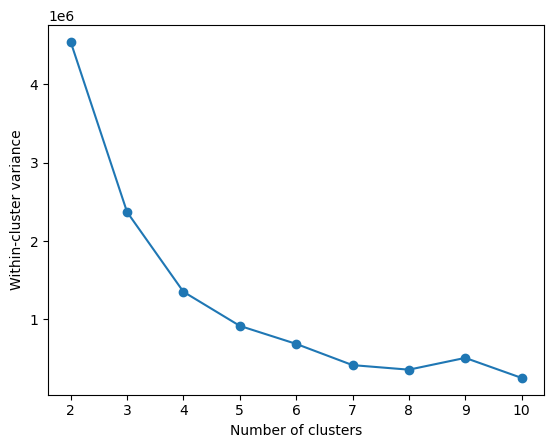

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()
X = data.data
y = data.target 
print("Dataset feature matrix:", X)
print("Dataset target vector:", y)

J = {}
np.random.seed(42)  # For reproducibility
for n_clusters in range(2, 11):
    centers_init = X[np.random.choice(X.shape[0], n_clusters, replace = False)]
    kmeans = KMeans(n_clusters=n_clusters, init=centers_init, n_init=1)
    kmeans.fit(X)
    within_cluster_var = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
    J[n_clusters] = within_cluster_var
    print(f"Within-cluster variance for {n_clusters} clusters:", within_cluster_var)

plt.plot(list(J.keys()), list(J.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster variance')